<a href="https://colab.research.google.com/github/fxrdhan/Tubes_AI_Kelompok-1_Bike-Sharing-Demand-Predictor/blob/main/Seoul_Bike_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sharing Demand Prediction**

**Tugas Besar AI - Linear Regression**

**Kelompok 1 [TK 47-04]**
- Firdaus Arif Ramadhani - 101032300131
- Muhammad Fakhri Arrasyid - 101032300150
- Yoga Reswara - 101032300119

Dataset: [Seoul Bike Sharing Demand (UCI ML Repository)](https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand)

## **1. Pendahuluan**

### 1.1 Latar Belakang

Sistem bike sharing telah mengalami perkembangan pesat dalam dua dekade terakhir sebagai salah satu solusi transportasi urban yang berkelanjutan. Menurut data dari berbagai kota besar dunia, layanan penyewaan sepeda publik menjadi alternatif transportasi yang semakin diminati karena fleksibilitas, efisiensi biaya, dan dampak lingkungan yang minimal. Sistem ini memungkinkan pengguna untuk menyewa sepeda dari satu stasiun dan mengembalikannya di stasiun lain, sehingga mendukung konsep mobilitas berbasis sharing economy.

Salah satu tantangan utama dalam pengelolaan sistem bike sharing adalah ketidakseimbangan antara ketersediaan sepeda (supply) dan permintaan pengguna (demand) di berbagai stasiun. Ketidakseimbangan ini dapat menyebabkan dua permasalahan operasional, yaitu kekurangan sepeda di stasiun dengan permintaan tinggi dan penumpukan sepeda di stasiun dengan permintaan rendah. Oleh karena itu, kemampuan untuk memprediksi jumlah penyewaan sepeda menjadi krusial bagi operator dalam merencanakan redistribusi sepeda secara efektif.

Berbagai faktor diketahui mempengaruhi jumlah penyewaan sepeda, di antaranya kondisi cuaca (suhu, kelembaban, curah hujan, kecepatan angin), faktor temporal (jam dalam sehari, hari kerja atau libur, musim), serta ketersediaan layanan. Pemahaman terhadap hubungan antara faktor-faktor tersebut dengan jumlah penyewaan dapat dilakukan melalui pendekatan pemodelan statistik, salah satunya adalah Multiple Linear Regression.

Dalam proyek ini, digunakan dataset Seoul Bike Sharing Demand yang bersumber dari UCI Machine Learning Repository. Dataset ini dipilih berdasarkan beberapa pertimbangan. Pertama, variabel cuaca dalam dataset ini tersedia dalam nilai aktual dengan satuan yang jelas (suhu dalam Celcius, curah hujan dalam milimeter, dan sebagainya), sehingga koefisien regresi yang dihasilkan dapat diinterpretasikan secara langsung dalam konteks dunia nyata. Kedua, dataset ini memiliki variabel cuaca yang lebih lengkap dibandingkan dataset sejenis, termasuk Solar Radiation, Visibility, dan Dew Point Temperature, yang memungkinkan eksplorasi lebih mendalam terhadap multikolinearitas antar prediktor. Ketiga, keberadaan variabel Functioning Day memungkinkan pemisahan antara hari operasional dan non-operasional, sehingga analisis tidak terdistorsi oleh observasi dengan nilai nol akibat penutupan layanan.

### 1.2 Rumusan Masalah

Berdasarkan latar belakang yang telah diuraikan, rumusan masalah dalam proyek ini adalah sebagai berikut:

1. Faktor-faktor apa saja yang mempengaruhi jumlah penyewaan sepeda pada sistem bike sharing?
2. Bagaimana membangun model prediksi jumlah penyewaan sepeda menggunakan algoritma Multiple Linear Regression berdasarkan data kondisi cuaca dan waktu?
3. Seberapa baik performa model Multiple Linear Regression dalam memprediksi jumlah penyewaan sepeda, dan apa saja limitasi yang ditemukan?

### 1.3 Tujuan

Tujuan dari proyek ini adalah:

1. Mengidentifikasi variabel-variabel yang memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda berdasarkan analisis statistik.
2. Membangun model Multiple Linear Regression untuk memprediksi jumlah penyewaan sepeda dengan mempertimbangkan asumsi-asumsi yang mendasari metode tersebut.
3. Mengevaluasi performa model menggunakan metrik evaluasi yang relevan serta mengidentifikasi area yang memerlukan perbaikan.

### 1.4 Manfaat

Hasil analisis dari proyek ini diharapkan dapat memberikan manfaat sebagai berikut:

1. Secara teoritis, proyek ini memberikan pemahaman mengenai penerapan Multiple Linear Regression dalam konteks prediksi demand, termasuk penanganan multikolinearitas dan pelanggaran asumsi.
2. Secara praktis, temuan dari proyek ini dapat menjadi referensi bagi operator bike sharing dalam merencanakan distribusi sepeda berdasarkan kondisi cuaca dan waktu, serta mengantisipasi fluktuasi permintaan pada periode tertentu.

### 1.5 Batasan Masalah

Untuk menjaga fokus analisis, proyek ini memiliki batasan sebagai berikut:

1. Dataset yang digunakan adalah Seoul Bike Sharing Demand dari UCI Machine Learning Repository dengan periode observasi tahun 2017 hingga 2018.
2. Metode pemodelan yang digunakan terbatas pada Multiple Linear Regression dan tidak mencakup algoritma machine learning lainnya seperti Random Forest atau Gradient Boosting.
3. Analisis dilakukan pada level agregat per jam dan tidak mempertimbangkan perbedaan antar stasiun penyewaan.

---
## **2. Pengumpulan Data**

In [ ]:
!pip install ucimlrepo -q
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pd.set_option('display.max_columns', None)

In [ ]:
dataset = fetch_ucirepo(id=560)
df = pd.concat([dataset.data.features, dataset.data.targets], axis=1)
df

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


---
## **3. Pemahaman Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
df.isnull().sum().to_frame('missing_count')

,missing_count
Date,0
Rented Bike Count,0
Hour,0
Temperature,0
Humidity,0
Wind speed,0
Visibility,0
Dew point temperature,0
Solar Radiation,0
Rainfall,0


**Info:**
- Dataset memiliki 8760 entries dan 14 kolom tanpa missing values
- 4 kolom kategorikal (Date, Seasons, Holiday, Functioning Day) dan 10 kolom numerik
- Kolom `Date` tidak relevan untuk model prediksi yang nanti akan dihapus

In [ ]:
# Cek duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

if duplicates > 0:
    df = df.drop_duplicates()

Jumlah data duplikat: 0


Dataset tidak memiliki data duplikat sehingga tidak perlu dilakukan penghapusan data duplikat.

---
## **4. Analisis Data Eksploratif (EDA)**

Sebelum melakukan pemodelan, perlu dilakukan eksplorasi data untuk memahami karakteristik dan pola yang terkandung di dalamnya. Analisis data eksploratif bertujuan untuk mengidentifikasi distribusi variabel target, mendeteksi keberadaan outlier, menganalisis korelasi antar variabel, serta menemukan insight yang dapat mengarahkan proses feature engineering dan pemilihan model.
Tahapan EDA dalam proyek ini meliputi: (1) analisis distribusi variabel target (Rented Bike Count), (2) deteksi dan penanganan outlier, (3) analisis korelasi antar fitur numerik, dan (4) eksplorasi pola penyewaan berdasarkan variabel temporal dan kategorikal.


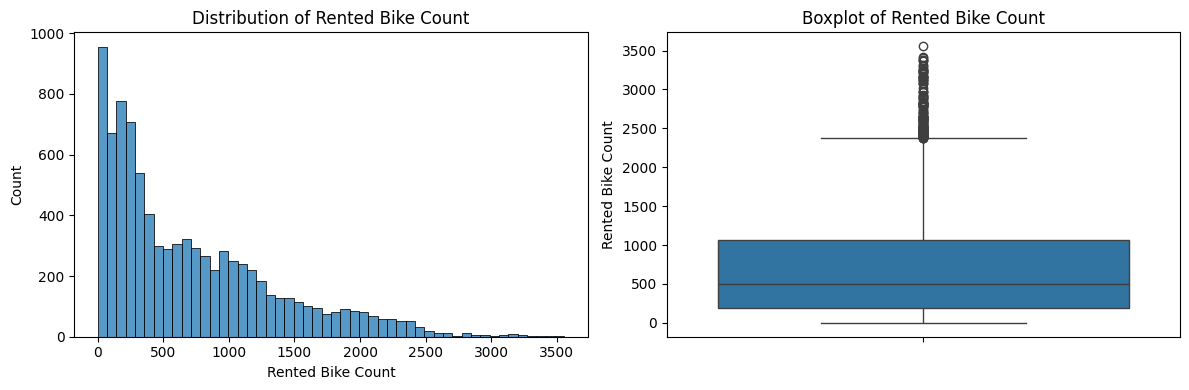

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Rented Bike Count'], bins=50, ax=axes[0])
axes[0].set_title('Distribution of Rented Bike Count')

sns.boxplot(y=df['Rented Bike Count'], ax=axes[1])
axes[1].set_title('Boxplot of Rented Bike Count')
plt.tight_layout()
plt.show()

## 4.1. Deteksi Outlier

Deteksi outlier dilakukan menggunakan metode Interquartile Range (IQR). Metode ini mengidentifikasi nilai-nilai ekstrem berdasarkan sebaran data pada kuartil. Faktor pengali 1.5 merupakan konvensi standar yang diperkenalkan oleh John Tukey (1977) dalam metode boxplot.

### Formulasi Matematis

Diberikan dataset $X = \{x_1, x_2, ..., x_n\}$, maka:

**Kuartil Pertama (Q1):**
$$Q_1 = P_{25}(X)$$

**Kuartil Ketiga (Q3):**
$$Q_3 = P_{75}(X)$$

**Interquartile Range:**
$$IQR = Q_3 - Q_1$$

**Batas Bawah (Lower Bound):**
$$L_b = Q_1 - 1.5 \times IQR$$

**Batas Atas (Upper Bound):**
$$U_b = Q_3 + 1.5 \times IQR$$

**Kriteria Outlier:**

Suatu observasi $x_i$ dikategorikan sebagai outlier jika dan hanya jika:

$$x_i < L_b \quad \lor \quad x_i > U_b$$

atau dalam notasi himpunan:

$$\text{Outliers} = \{x_i \in X \mid x_i < (Q_1 - 1.5 \cdot IQR) \lor x_i > (Q_3 + 1.5 \cdot IQR)\}$$


In [ ]:
# Hitung statistik
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1
median = df['Rented Bike Count'].median()
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR}")
print(f"Batas bawah outlier: {lower_bound}")
print(f"Batas atas outlier: {upper_bound}")

outliers = df[(df['Rented Bike Count'] < lower_bound) | (df['Rented Bike Count'] > upper_bound)]
print(f"\nJumlah outlier: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

Q1 (25%): 191.0
Q3 (75%): 1065.25
IQR: 874.25
Batas bawah outlier: -1120.375
Batas atas outlier: 2376.625

Jumlah outlier: 158 (1.80%)


Berdasarkan perhitungan di atas, batas atas outlier ditemukan pada nilai 2376.625. Data dengan jumlah penyewaan di atas batas tersebut secara statistik dikategorikan sebagai outlier, dengan total 158 observasi atau 1.80% dari keseluruhan data.

Outlier pada variabel Rented Bike Count tidak akan dihapus dari dataset. Keputusan ini didasarkan pada pertimbangan bahwa nilai-nilai ekstrem tersebut bukan merupakan noise atau error pengukuran, melainkan representasi demand aktual yang terjadi pada kondisi tertentu seperti jam sibuk, cuaca optimal, dan hari operasional. Kemampuan model untuk memprediksi peak demand justru menjadi informasi yang berguna bagi operator dalam merencanakan distribusi dan alokasi sepeda.

### 4.2. Korelasi Semua Fitur

Analisis korelasi dilakukan untuk mengidentifikasi hubungan linear antar variabel numerik. Matriks korelasi divisualisasikan menggunakan heatmap untuk memudahkan identifikasi pasangan variabel dengan korelasi tinggi yang berpotensi menyebabkan multikolinearitas.

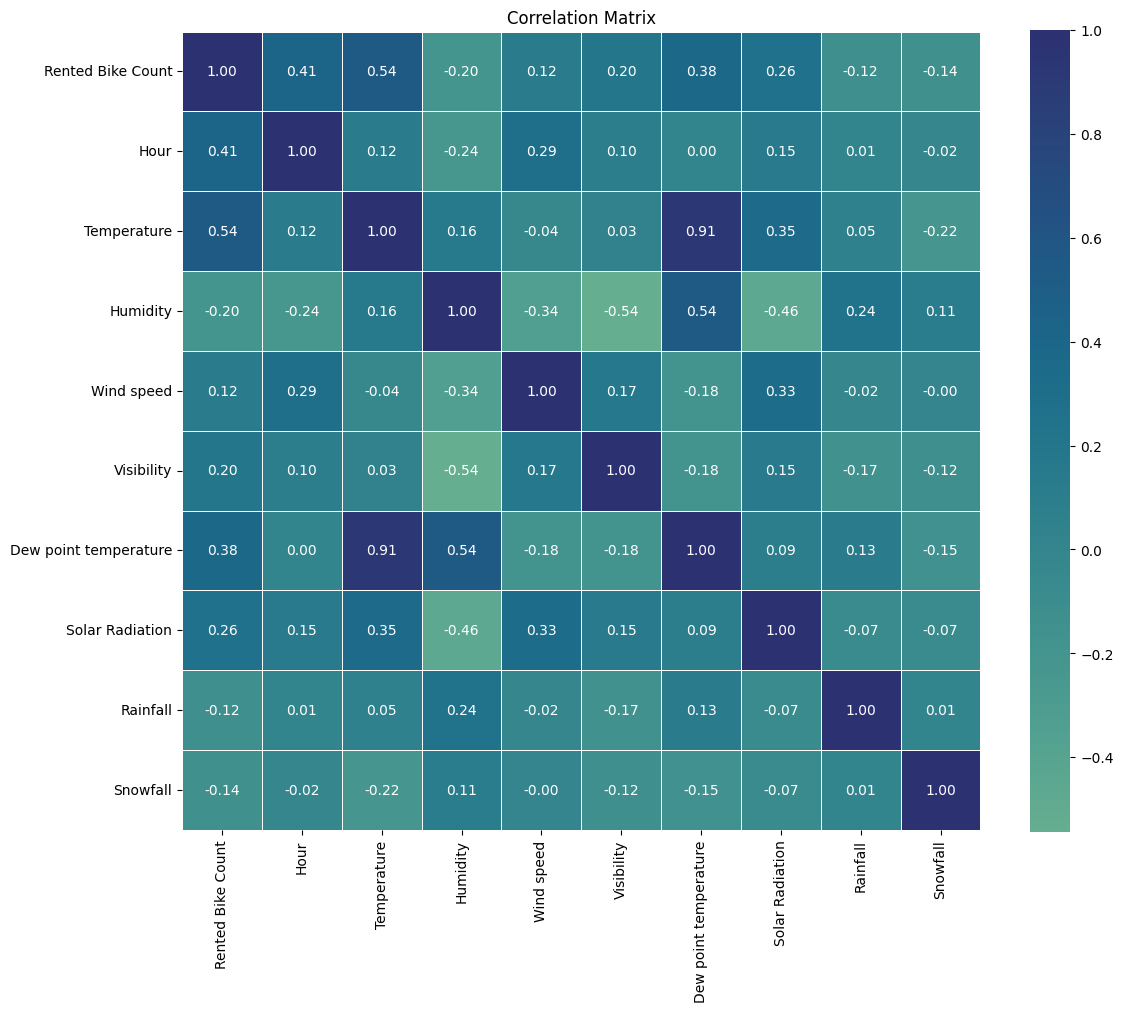

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='crest', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Temperature & Dew Point memiliki korelasi tinggi (0.91)**

Korelasi 0.91 menunjukkan kedua variabel memberikan informasi hampir identik. Menyimpan keduanya akan menyebabkan multikolinearitas yang dapat mengganggu performa model. Cukup pertahankan `Temperature` karena lebih fundamental, sementara `Dew point temperature` dapat dihapus.

### 4.3. Korelasi Fitur dengan Target

Untuk menentukan fitur mana yang paling relevan sebagai prediktor, dilakukan analisis korelasi antara setiap fitur dengan variabel target (Rented Bike Count). Fitur dengan korelasi tinggi terhadap target berpotensi menjadi prediktor yang kuat dalam model regresi.

In [ ]:
corr_matrix['Rented Bike Count'].sort_values(ascending=False).to_frame('correlation')

,correlation
Rented Bike Count,1.000000
Temperature,0.538558
Hour,0.410257
Dew point temperature,0.379788
Solar Radiation,0.261837
Visibility,0.199280
Wind speed,0.121108
Rainfall,-0.123074
Snowfall,-0.141804
Humidity,-0.199780


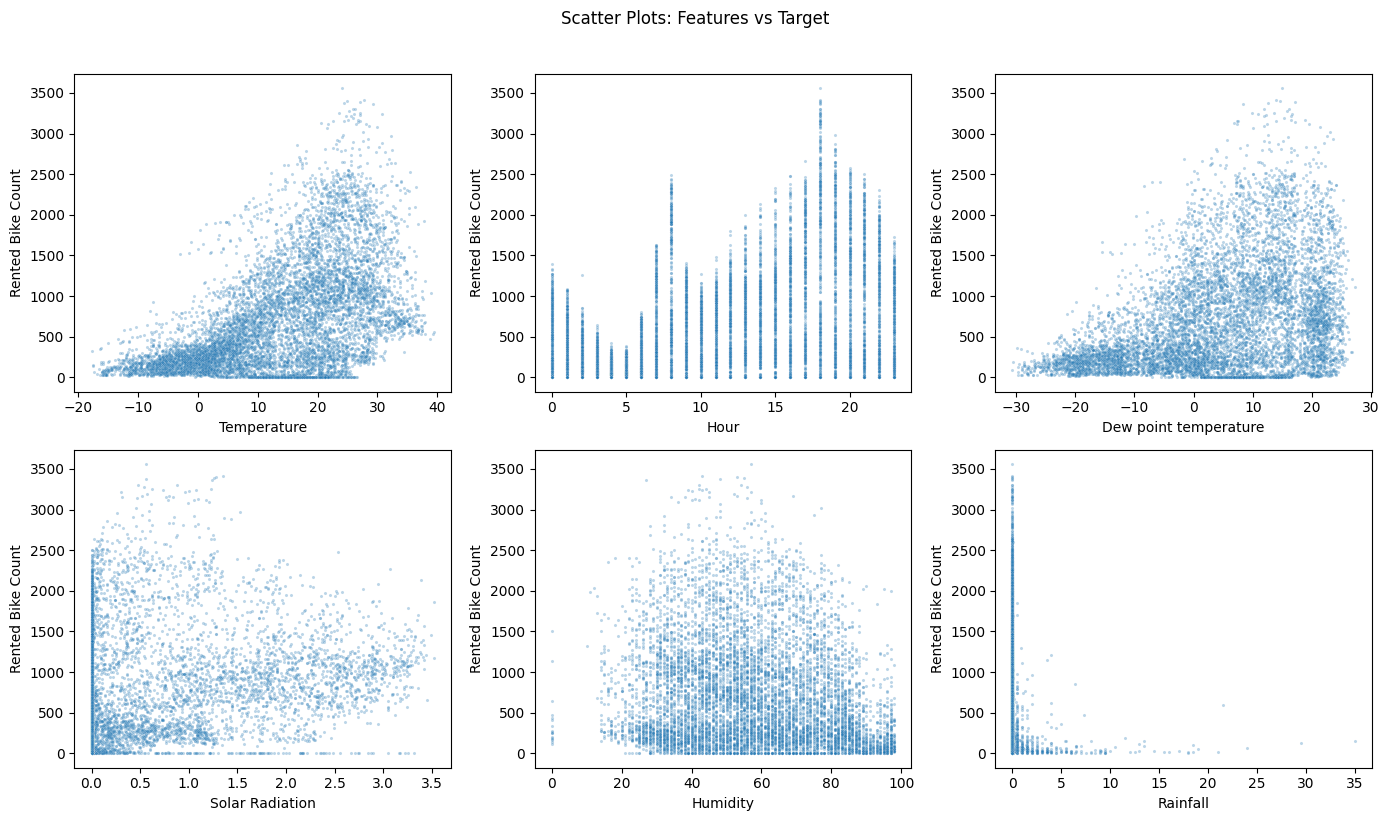

In [ ]:
top_features = ['Temperature', 'Hour', 'Dew point temperature',
                'Solar Radiation', 'Humidity', 'Rainfall']

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
for idx, feat in enumerate(top_features):
    ax = axes[idx // 3, idx % 3]
    sns.scatterplot(data=df, x=feat, y='Rented Bike Count',
                    alpha=0.3, s=5, ax=ax)
plt.suptitle('Scatter Plots: Features vs Target', y=1.02)
plt.tight_layout()
plt.show()

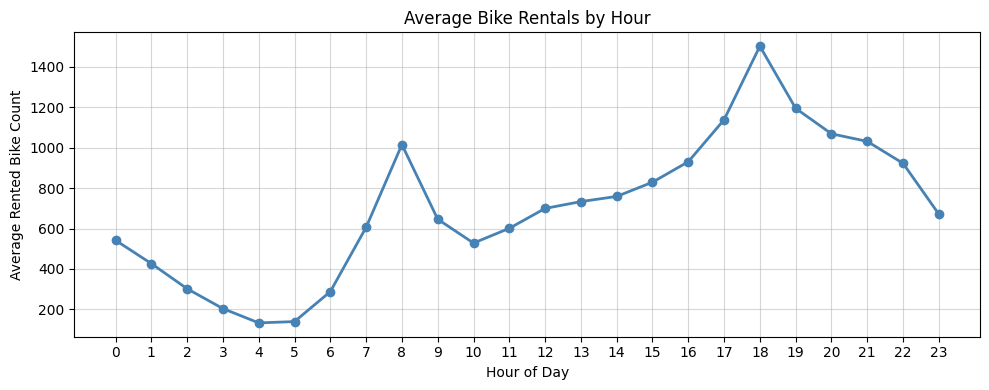

In [ ]:
hourly_avg = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(hourly_avg['Hour'], hourly_avg['Rented Bike Count'],
         marker='o', linewidth=2, markersize=6, color='steelblue')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Bike Rentals by Hour')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

Suhu memiliki korelasi positif terkuat (0,54) dengan jumlah penyewaan sepeda, sementara kelembaban berkorelasi negatif (-0,20) yang berarti kelembaban tinggi cenderung menurunkan penyewaan. Untuk variabel jam, terdapat pola non-linear di mana penyewaan tertinggi terjadi pada jam 8 pagi dan jam 6 sore, yang mencerminkan jam-jam sibuk aktivitas kerja.

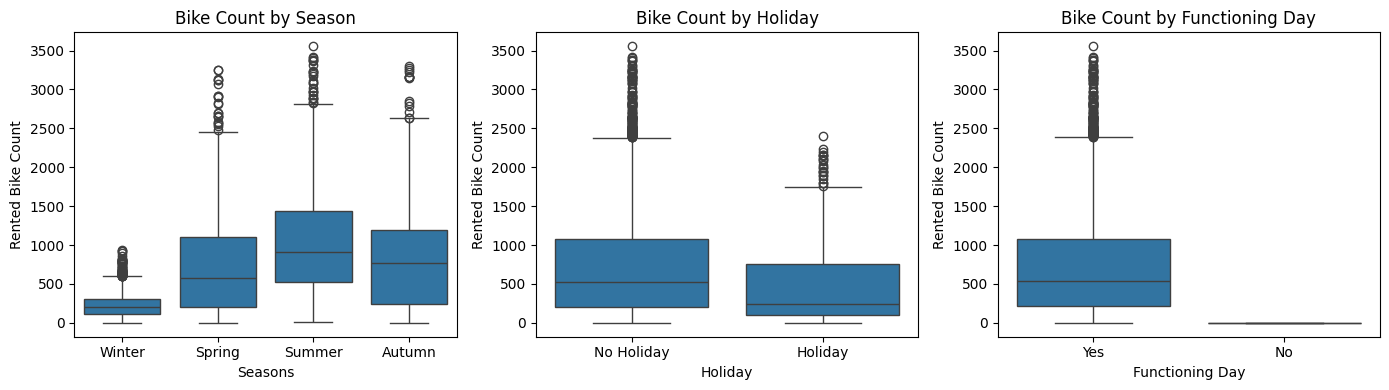

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.boxplot(data=df, x='Seasons', y='Rented Bike Count', ax=axes[0])
axes[0].set_title('Bike Count by Season')

sns.boxplot(data=df, x='Holiday', y='Rented Bike Count', ax=axes[1])
axes[1].set_title('Bike Count by Holiday')

sns.boxplot(data=df, x='Functioning Day', y='Rented Bike Count', ax=axes[2])
axes[2].set_title('Bike Count by Functioning Day')

plt.tight_layout()
plt.show()

Terlihat bahwa penyewaan sepeda tertinggi terjadi di musim Summer dan terendah di musim Winter. Selain itu, penyewaan justru lebih tinggi pada hari biasa  dibandingkan saat hari libur. Penyewaan  juga jauh lebih tinggi pada hari operasional, yang mengindikasikan bahwa mayoritas pengguna adalah pekerja yang menggunakan sepeda untuk aktivitas sehari-hari.

---
## **5. Pra-pemrosesan Data**

Sebelum membangun model, data perlu diproses terlebih dahulu. Tahapan meliputi encoding variabel kategorikal, penanganan outlier, dan pengecekan multikolinearitas.

### 5.1. Encoding Variabel Kategorikal

Algoritma Linear Regression hanya dapat memproses input numerik, sehingga variabel kategorikal perlu ditransformasi melalui proses encoding. Terdapat beberapa metode encoding yang umum digunakan diantaranya:

- **Label Encoding** mengubah setiap kategori menjadi angka integer (0, 1, 2, ...). Metode ini cocok untuk variabel ordinal yang memiliki urutan bermakna, misalnya tingkat pendidikan (SD=1, SMP=2, SMA=3).

- **Binary Encoding** mengubah kategori menjadi 0 atau 1, cocok untuk variabel dengan hanya 2 kategori (Yes/No, True/False).

- **One-Hot Encoding** membuat kolom dummy terpisah untuk setiap kategori. Cocok untuk variabel nominal yang tidak memiliki urutan. Parameter `drop_first=True` digunakan untuk menghindari multikolinearitas dengan menjadikan satu kategori sebagai reference.

Pada dataset ini, **Holiday** dan **Functioning Day** menggunakan Binary Encoding karena hanya memiliki 2 kategori. Sementara **Seasons** menggunakan One-Hot Encoding karena merupakan variabel nominal tanpa urutan.

In [ ]:
# Binary Encoding untuk Holiday dan Functioning Day
holiday_map = {'No Holiday': 0, 'Holiday': 1}
func_map = {'No': 0, 'Yes': 1}

df['Holiday'] = df['Holiday'].map(holiday_map)
df['Functioning Day'] = df['Functioning Day'].map(func_map)

# One-Hot Encoding untuk Seasons (drop_first=True untuk hindari multikolinearitas)
seasons_dummies = pd.get_dummies(df['Seasons'], prefix='Season', drop_first=True).astype(int)
df = pd.concat([df, seasons_dummies], axis=1)
df = df.drop(columns=['Seasons'])

df[['Holiday', 'Functioning Day'] + [col for col in df.columns if 'Season_' in col]].head(10)

,Holiday,Functioning Day,Season_Spring,Season_Summer,Season_Winter
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,0,1,0,0,1
4,0,1,0,0,1
5,0,1,0,0,1
6,0,1,0,0,1
7,0,1,0,0,1
8,0,1,0,0,1
9,0,1,0,0,1


### 5.2. VIF Check untuk Multicollinearity

Variance Inflation Factor (VIF) untuk deteksi multikolinearitas

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data numerik tanpa target
X_vif = df.select_dtypes(include=[np.number]).drop(columns=['Rented Bike Count'])

# Hitung VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

vif_data

,feature,VIF
1,Temperature,45.849977
10,Functioning Day,30.304283
5,Dew point temperature,29.396939
2,Humidity,20.322443
4,Visibility,9.772119
3,Wind speed,4.912904
0,Hour,4.527655
13,Season_Winter,4.392293
12,Season_Summer,3.489997
6,Solar Radiation,2.900491


**Interpretasi VIF:**

| VIF Value | Interpretasi |
|-----------|--------------|
| VIF = 1 | Tidak ada korelasi |
| 1 < VIF < 5 | Korelasi moderat |
| 5 < VIF < 10 | Korelasi tinggi |
| VIF > 10 | Multikolinearitas tinggi |

Hasil VIF menunjukkan bahwa `Temperature` dan `Dew Point Temperature` sama-sama memiliki nilai VIF sangat tinggi (>10) karena keduanya berkorelasi 0.91. Meskipun `Temperature` memiliki VIF tertinggi (45.85), yang di-drop adalah `Dew Point Temperature` dengan pertimbangan bahwa Temperature memiliki korelasi lebih kuat dengan target (0.54 vs 0.38).

### 5.3. Drop Multicollinearity

Korelasi antara `Temperature` dan `Dew Point Temperature` sangat tinggi yaitu **0.91**, yang dapat menyebabkan koefisien regresi menjadi tidak stabil. `Temperature` dipertahankan karena lebih fundamental, sedangkan `Dew Point Temperature` dihapus. Kolom `Date` juga dihapus karena tidak relevan untuk model prediksi numerik.

In [ ]:
df = df.drop(columns=['Dew point temperature', 'Date'])

In [ ]:
X_vif = df.select_dtypes(include=[np.number]).drop(columns=['Rented Bike Count'])

# Hitung VIF lagi
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

vif_data

,feature,VIF
9,Functioning Day,22.407243
2,Humidity,11.367898
1,Temperature,10.556650
4,Visibility,6.784268
3,Wind speed,4.836955
0,Hour,4.358381
12,Season_Winter,4.018017
11,Season_Summer,3.323445
5,Solar Radiation,2.558937
10,Season_Spring,2.211939


Setelah penghapusan `Dew Point`, variabel `Functioning Day` masih memiliki VIF tinggi (22.4). Namun, variabel ini tidak dihapus karena merupakan variabel kategorikal biner (dummy) yang krusial membedakan hari operasional vs libur. VIF tinggi pada variabel dummy lazim terjadi karena ketidakseimbangan kelas (mayoritas hari adalah Functioning Day) dan tidak selalu mengganggu performa prediksi secara signifikan.

### 5.4. Fitur (x) dan Target (y)

Target variable yang diprediksi adalah jumlah penyewaan sepeda, sedangkan 13 fitur lainnya digunakan sebagai prediktor (termasuk 3 kolom hasil One-Hot Encoding untuk Seasons).

In [47]:
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

pd.DataFrame({'set': ['X', 'y'], 'shape': [X.shape, y.shape]})

,set,shape
0,X,"(8760, 13)"
1,y,"(8760,)"


---
## **6. Pembagian Data**

### 6.1. Pembagian Data Training dan Testing

Data dibagi dengan rasio 80:20, dimana 80% data digunakan untuk training dan 20% sisanya untuk testing. Parameter `random_state=42` digunakan untuk memastikan hasil pembagian data dapat direproduksi dengan konsisten jika eksperimen diulang.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pd.DataFrame({
    'set': ['train', 'test'],
    'X_shape': [X_train.shape, X_test.shape],
    'y_shape': [y_train.shape, y_test.shape]
})

,set,X_shape,y_shape
0,train,"(7008, 13)","(7008,)"
1,test,"(1752, 13)","(1752,)"


---
## **7. Model Regresi Linear (Baseline)**

Setelah data siap, model Linear Regression dibangun untuk memprediksi jumlah penyewaan sepeda berdasarkan fitur-fitur yang telah diproses.

### 7.1. Pelatihan dan Prediksi

Model Linear Regression dilatih menggunakan data training, kemudian digunakan untuk memprediksi jumlah penyewaan pada data testing. Berikut perbandingan nilai aktual dan prediksi untuk 10 sampel pertama:

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

pd.DataFrame({'actual': y_test[:10].values, 'predicted': y_pred[:10].round(2)})

,actual,predicted
0,1728,949.52
1,822,1131.58
2,658,1353.27
3,2716,1326.75
4,1083,544.47
5,636,790.16
6,1537,1481.63
7,712,1098.35
8,425,951.86
9,594,811.10


---
## **8. Evaluasi Model**

Model yang telah dilatih dievaluasi menggunakan data testing untuk mengukur kemampuan generalisasi dan mengidentifikasi area yang perlu ditingkatkan.

### 8.1. Metrik Evaluasi

Performa model dievaluasi menggunakan empat metrik:

**R² (Coefficient of Determination)**

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

Mengukur proporsi variansi target yang dapat dijelaskan oleh model. Nilai 1 berarti model sempurna, nilai 0 berarti model tidak lebih baik dari rata-rata.

**Adjusted R²**

$$R^2_{adj} = 1 - (1 - R^2) \cdot \frac{n - 1}{n - p - 1}$$

R² yang disesuaikan dengan jumlah fitur (p) dan sampel (n). Mencegah overfitting karena menambah fitur tidak selalu meningkatkan nilai.

**MAE (Mean Absolute Error)**

$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$$

Rata-rata error absolut dalam satuan asli target. Mudah diinterpretasi: "rata-rata prediksi meleset sekitar X sepeda".

**RMSE (Root Mean Squared Error)**

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

Akar dari rata-rata error kuadrat. Lebih sensitif terhadap error besar dibanding MAE.

In [ ]:
r2 = r2_score(y_test, y_pred)
n, p = X_test.shape
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

pd.DataFrame({
    'metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
    'value': [round(r2, 4), round(adj_r2, 4), round(mae, 2), round(mse, 2), round(rmse, 2)]
})

,metric,value
0,R²,0.5329
1,Adjusted R²,0.5294
2,MAE,330.9500
3,MSE,194612.1400
4,RMSE,441.1500


Model Linear Regression yang dibangun mampu menjelaskan ~53% variasi data dengan rata-rata error prediksi ~441 sepeda.

### 8.2. Plot Aktual vs Prediksi

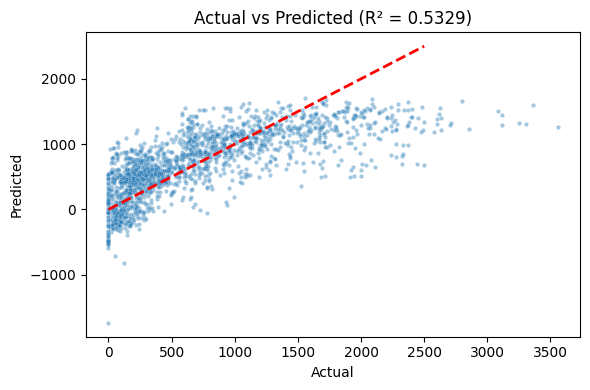

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, s=10)
sns.lineplot(x=[0, 2500], y=[0, 2500], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted (R² = {r2:.4f})')
plt.tight_layout()
plt.show()

Dari plot terlihat sebaran prediksi terhadap nilai aktual cukup mengikuti garis diagonal yang menunjukkan model mampu menangkap pola umum. Namun terdapat penyebaran yang cukup lebar terutama pada nilai tinggi, serta beberapa prediksi negatif pada nilai aktual rendah yang perlu diinvestigasi lebih lanjut.

### 8.3. Analisis Residual

Residual adalah selisih antara nilai aktual dan nilai prediksi model, yang dihitung dengan rumus:

$$e_i = y_i - \hat{y}_i$$

Dimana:

- $e_i$ : Residual
- $y_i$ : Nilai aktual
- $\hat{y}_i$ : Nilai prediksi
- $i$ : Indeks observasi, dimana i = 1, 2, 3, ..., n (n = jumlah total observasi)

Model yang baik menghasilkan residual yang tersebar acak di sekitar nol tanpa pola tertentu, dengan distribusi mendekati normal.

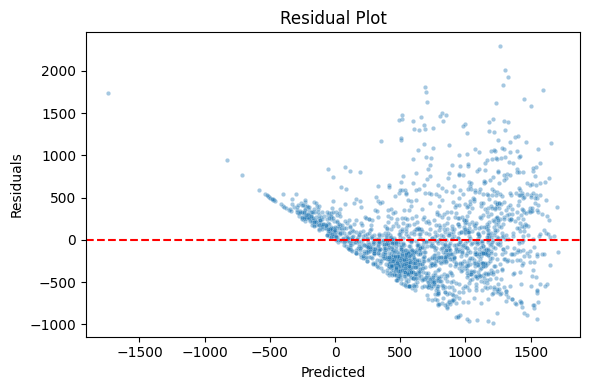

In [ ]:
residuals = y_test - y_pred

fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(x=y_pred, y=residuals, alpha=0.4, s=10, ax=ax)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')

plt.tight_layout()
plt.show()

Untuk memvalidasi asumsi Normalitas Residual, diperlukan banding distribusi error yang dihasilkan model dengan distribusi normal teoretis.

Rumus **Probability Density Function (PDF)** distribusi normal sebagai berikut:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

Dimana:

- $\mu$ (mu) adalah rata-rata (mean) dari residual.
- $\sigma$ (std) adalah standar deviasi dari residual.

Tujuannya adalah untuk melihat apakah histogram residual (data aktual) berbentuk lonceng yang selaras dengan garis merah (kurva teoretis). Jika selaras, maka asumsi normalitas terpenuhi.

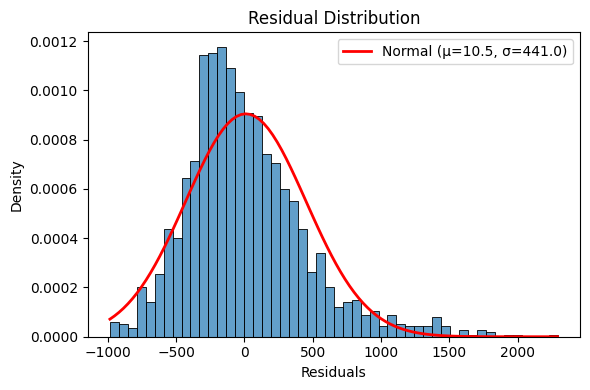

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(residuals, bins=50, ax=ax, stat='density', alpha=0.7)

# Normal curve
mu, std = np.mean(residuals), np.std(residuals)
x = np.linspace(residuals.min(), residuals.max(), 100)
normal_curve = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
ax.plot(x, normal_curve, 'r-', linewidth=2, label=f'Normal (μ={mu:.1f}, σ={std:.1f})')

ax.set_xlabel('Residuals')
ax.set_title('Residual Distribution')
ax.legend()

plt.tight_layout()
plt.show()

Plot residual menunjukkan pola heteroskedastisitas dimana *variance error* tidak konstan sepanjang prediksi. Distribusi residual cenderung normal namun sedikit miring, dengan rentang nilai antara -1000 hingga +1500. Hal ini mengindikasikan model linear kurang optimal untuk data ini.

---
## **9. Peningkatan Model**
Dari evaluasi model baseline, diperoleh R² = 0.5615 yang menunjukkan model mampu menjelaskan 56% variasi data. Terdapat beberapa strategi untuk meningkatkan performa model:

1. **Feature Engineering** - Menambah fitur baru berdasarkan insight dari EDA
2. **Feature Scaling** - Standardisasi fitur agar skala seragam

### 9.1. Feature Engineering (Rekayasa Fitur)

Berdasarkan insight dari EDA, beberapa fitur baru dapat dibuat untuk meningkatkan performa model. Jam sibuk (rush hour) pada pukul 8 dan 18 menunjukkan penyewaan tinggi, sehingga perlu dibuat fitur khusus. Selain itu, transformasi siklikal pada variabel Hour diperlukan agar model memahami bahwa jam 23 dekat dengan jam 0.

In [ ]:
# Feature Engineering pada data asli
X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# 1. Rush Hour (jam sibuk: 7-9 pagi dan 17-19 sore)
X_train_fe['is_rush_hour'] = X_train_fe['Hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)
X_test_fe['is_rush_hour'] = X_test_fe['Hour'].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)

# 2. Transformasi siklikal untuk Hour
X_train_fe['hour_sin'] = np.sin(2 * np.pi * X_train_fe['Hour'] / 24)
X_train_fe['hour_cos'] = np.cos(2 * np.pi * X_train_fe['Hour'] / 24)
X_test_fe['hour_sin'] = np.sin(2 * np.pi * X_test_fe['Hour'] / 24)
X_test_fe['hour_cos'] = np.cos(2 * np.pi * X_test_fe['Hour'] / 24)

# 3. Interaksi Temperature dan Humidity
X_train_fe['temp_humidity'] = X_train_fe['Temperature'] * X_train_fe['Humidity']
X_test_fe['temp_humidity'] = X_test_fe['Temperature'] * X_test_fe['Humidity']

# 4. Kategori waktu dalam sehari
def time_of_day(hour):
    if 5 <= hour < 12:
        return 1  # Morning
    elif 12 <= hour < 17:
        return 2  # Afternoon
    elif 17 <= hour < 21:
        return 3  # Evening
    else:
        return 0  # Night

X_train_fe['time_of_day'] = X_train_fe['Hour'].apply(time_of_day)
X_test_fe['time_of_day'] = X_test_fe['Hour'].apply(time_of_day)

print(f"Fitur sebelum FE: {X_train.shape[1]} kolom")
print(f"Fitur sesudah FE: {X_train_fe.shape[1]} kolom")
print(f"\nFitur baru yang ditambahkan: {list(set(X_train_fe.columns) - set(X_train.columns))}")

Fitur sebelum FE: 13 kolom
Fitur sesudah FE: 18 kolom

Fitur baru yang ditambahkan: ['is_rush_hour', 'temp_humidity', 'hour_sin', 'hour_cos', 'time_of_day']


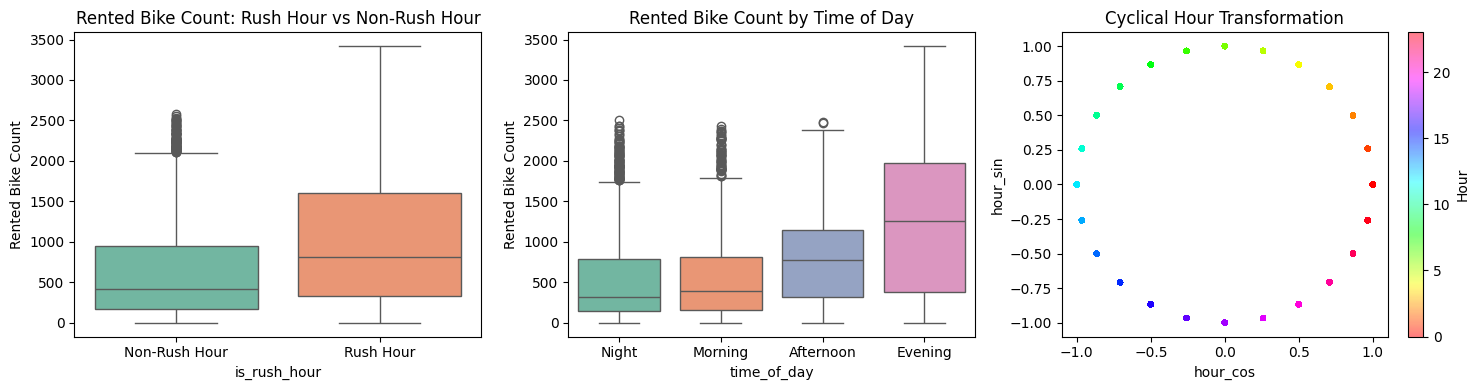

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

X_vis = X_train_fe.copy()
X_vis['Rented Bike Count'] = y_train.values

# Rush Hour vs Rented Bike Count
sns.boxplot(data=X_vis, x='is_rush_hour', y='Rented Bike Count', ax=axes[0], hue='is_rush_hour', palette='Set2', legend=False)
axes[0].set_title('Rented Bike Count: Rush Hour vs Non-Rush Hour')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Non-Rush Hour', 'Rush Hour'])

# Time of Day vs Rented Bike Count
sns.boxplot(data=X_vis, x='time_of_day', y='Rented Bike Count', ax=axes[1], hue='time_of_day', palette='Set2', legend=False)
axes[1].set_title('Rented Bike Count by Time of Day')
axes[1].set_xticks([0, 1, 2, 3])
axes[1].set_xticklabels(['Night', 'Morning', 'Afternoon', 'Evening'])

# Hour Cyclical Transformation
scatter = axes[2].scatter(X_train_fe['hour_cos'], X_train_fe['hour_sin'],
                          c=X_train_fe['Hour'], cmap='hsv', alpha=0.5, s=10)
axes[2].set_xlabel('hour_cos')
axes[2].set_ylabel('hour_sin')
axes[2].set_title('Cyclical Hour Transformation')
plt.colorbar(scatter, ax=axes[2], label='Hour')

plt.tight_layout()
plt.show()

### 9.2. Standarisasi Fitur

Setiap variabel dalam dataset memiliki skala berbeda (misalnya Temperature: -20 s.d. 40°C, Visibility: hingga 2000m). StandardScaler digunakan untuk mentransformasi semua variabel agar memiliki mean = 0 dan standar deviasi = 1, sehingga koefisien regresi dapat dibandingkan secara adil untuk menentukan fitur mana yang paling berpengaruh.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit dan transform
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

# Konversi ke DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_fe.columns, index=X_train_fe.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_fe.columns, index=X_test_fe.index)

print("Statistik setelah scaling (mean ≈ 0, std ≈ 1):")
X_train_scaled.describe().round(2).loc[['mean', 'std']].T

Statistik setelah scaling (mean ≈ 0, std ≈ 1):


,mean,std
Hour,0.0,1.0
Temperature,0.0,1.0
Humidity,-0.0,1.0
Wind speed,-0.0,1.0
Visibility,0.0,1.0
Solar Radiation,0.0,1.0
Rainfall,0.0,1.0
Snowfall,-0.0,1.0
Holiday,-0.0,1.0
Functioning Day,0.0,1.0


### 9.3. Latih Model Improved

Latih ulang model Linear Regression dengan fitur baru dan data yang sudah di-scale.

In [ ]:
# Train model improved
model_improved = LinearRegression()
model_improved.fit(X_train_scaled, y_train)
y_pred_improved = model_improved.predict(X_test_scaled)

pd.DataFrame({
    'actual': y_test[:10].values,
    'predicted_baseline': y_pred[:10].round(2),
    'predicted_improved': y_pred_improved[:10].round(2)
})

,actual,predicted_baseline,predicted_improved
0,1728,949.52,1104.63
1,822,1131.58,1112.68
2,658,1353.27,1310.14
3,2716,1326.75,1620.17
4,1083,544.47,724.58
5,636,790.16,790.33
6,1537,1481.63,1313.84
7,712,1098.35,979.21
8,425,951.86,1102.47
9,594,811.10,823.85


### 9.4. Perbandingan Performa

In [ ]:
r2_improved = r2_score(y_test, y_pred_improved)
n, p = X_test_scaled.shape
adj_r2_improved = 1 - (1 - r2_improved) * (n - 1) / (n - p - 1)
mae_improved = mean_absolute_error(y_test, y_pred_improved)
mse_improved = mean_squared_error(y_test, y_pred_improved)
rmse_improved = np.sqrt(mse_improved)

comparison = pd.DataFrame({
    'Metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
    'Baseline': [round(r2, 4), round(adj_r2, 4), round(mae, 2), round(mse, 2), round(rmse, 2)],
    'Improved': [round(r2_improved, 4), round(adj_r2_improved, 4), round(mae_improved, 2), round(mse_improved, 2), round(rmse_improved, 2)]
})

comparison['Change'] = comparison['Improved'] - comparison['Baseline']
comparison['Change (%)'] = ((comparison['Improved'] - comparison['Baseline']) / comparison['Baseline'] * 100).round(2)

comparison

,Metric,Baseline,Improved,Change,Change (%)
0,R²,0.5329,0.6189,0.0860,16.14
1,Adjusted R²,0.5294,0.6149,0.0855,16.15
2,MAE,330.9500,299.6100,-31.3400,-9.47
3,MSE,194612.1400,158785.2100,-35826.9300,-18.41
4,RMSE,441.1500,398.4800,-42.6700,-9.67


### 9.5. Cross-Validation

Mengingat evaluasi sebelumnya hanya menggunakan satu kali pembagian data (*single split* 80:20), terdapat risiko bahwa performa model bias terhadap data testing tertentu. Untuk menjawab hal ini, dilakukan **5-Fold Cross-Validation** pada `model_improved`. Teknik ini membagi data training menjadi 5 bagian berbeda dan melatih ulang model sebanyak 5 kali untuk melihat rata-rata kinerjanya. Hasil di bawah menunjukkan performa model yang lebih objektif dan stabil

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Buat 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hitung R2 score untuk setiap fold
cv_scores = cross_val_score(model_improved, X_train_scaled, y_train, cv=kf, scoring='r2')

print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Rata-rata R2: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Cross-Validation R2 Scores: [0.61513987 0.65155543 0.61604754 0.62926432 0.62289631]
Rata-rata R2: 0.6270 (+/- 0.0133)


Berdasarkan hasil 5-Fold Cross-Validation di atas, diperoleh rata-rata skor $R^2$ sebesar **0.6270** dengan standar deviasi yang sangat rendah yaitu **0.0133**.

Standar deviasi yang kecil (< 0.02) menunjukkan bahwa model memiliki performa yang konsisten dan **tidak mengalami overfitting** pada subset data tertentu. Model mampu melakukan generalisasi dengan baik pada berbagai variasi data uji.
Dengan rata-rata skor cross-validation (0.6270) bahkan sedikit lebih tinggi dibandingkan skor *single split* awal (0.6189), yang mengonfirmasi bahwa metrik performa yang dilaporkan sebelumnya adalah estimasi yang valid dan objektif, bukan sekadar kebetulan akibat pembagian data (*random split*).

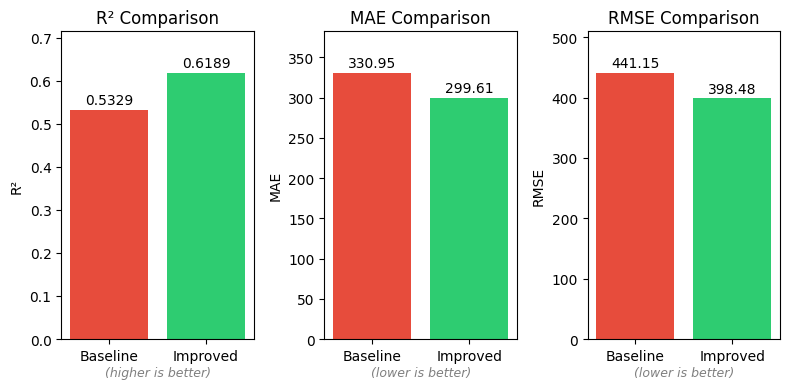

In [ ]:
# Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

metrics = ['R²', 'MAE', 'RMSE']
baseline_vals = [r2, mae, rmse]
improved_vals = [r2_improved, mae_improved, rmse_improved]

x = np.arange(len(metrics))
width = 0.35

for i, (metric, base, imp) in enumerate(zip(metrics, baseline_vals, improved_vals)):
    bars1 = axes[i].bar(['Baseline', 'Improved'], [base, imp], color=['#e74c3c', '#2ecc71'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)

    for bar, val in zip(bars1, [base, imp]):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01*bar.get_height(),
                     f'{val:.2f}' if metric != 'R²' else f'{val:.4f}',
                     ha='center', va='bottom')

    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(ymin, ymax * 1.1)

    if metric == 'R²':
        axes[i].text(0.5, -0.12, '(higher is better)', ha='center', transform=axes[i].transAxes,
                     fontsize=9, fontstyle='italic', color='gray')
    else:
        axes[i].text(0.5, -0.12, '(lower is better)', ha='center', transform=axes[i].transAxes,
                     fontsize=9, fontstyle='italic', color='gray')

plt.tight_layout()
plt.show()

Feature engineering dan scaling berhasil meningkatkan performa model. Peningkatan R² menunjukkan bahwa fitur-fitur baru seperti `is_rush_hour`, transformasi siklikal `hour_sin` dan `hour_cos`, serta interaksi `temp_humidity` berhasil menangkap pola yang sebelumnya tidak tertangkap oleh model baseline. Penurunan MAE dan RMSE mengindikasikan bahwa error prediksi menjadi lebih kecil secara rata-rata.

### 9.6. Uji Asumsi

Linear Regression memiliki beberapa asumsi yang harus dipenuhi yaitu *linearity*, *normality of residuals*, *homoscedasticity*, dan *independence*. Pada tahap ini dilakukan uji normalitas residual menggunakan **Shapiro-Wilk test** untuk menguji apakah residual berdistribusi normal (H₀) atau tidak (H₁).

In [ ]:
from scipy import stats

residuals_improved = y_test - y_pred_improved

# Normality Test
sample_residuals = np.random.choice(residuals_improved, size=min(5000, len(residuals_improved)), replace=False)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
skewness = stats.skew(residuals_improved)
kurtosis = stats.kurtosis(residuals_improved)

print(f"Shapiro-Wilk: stat={shapiro_stat:.4f}, p={shapiro_p:.6f}")
print(f"Skewness: {skewness:.4f} | Kurtosis: {kurtosis:.4f}")
print(f"Hasil: {'Tidak Normal' if shapiro_p < 0.05 else 'Normal'}")

Shapiro-Wilk: stat=0.9708, p=0.000000
Skewness: 0.6872 | Kurtosis: 1.5957
Hasil: Tidak Normal


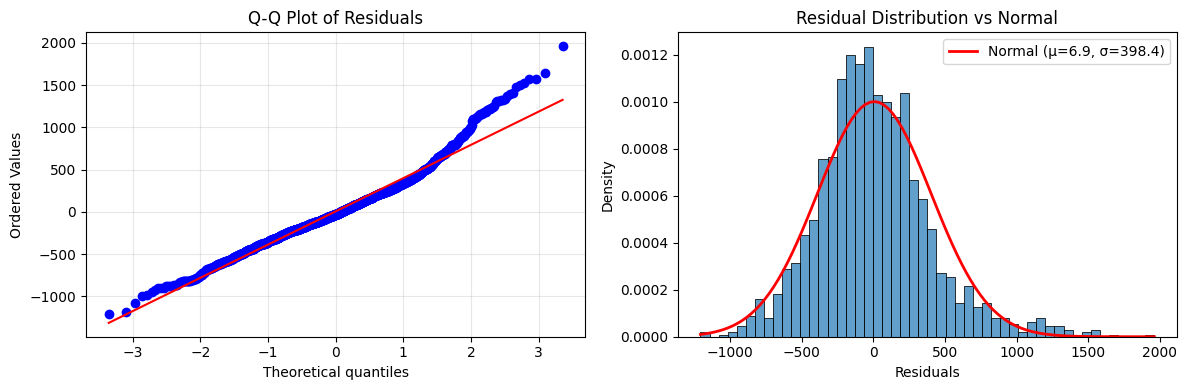

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Q-Q Plot
stats.probplot(residuals_improved, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot of Residuals')
axes[0].grid(True, alpha=0.3)

# Histogram vs Normal
sns.histplot(residuals_improved, bins=50, ax=axes[1], stat='density', alpha=0.7)
mu, std = np.mean(residuals_improved), np.std(residuals_improved)
x = np.linspace(residuals_improved.min(), residuals_improved.max(), 100)
normal_curve = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)
axes[1].plot(x, normal_curve, 'r-', linewidth=2, label=f'Normal (μ={mu:.1f}, σ={std:.1f})')
axes[1].set_xlabel('Residuals')
axes[1].set_title('Residual Distribution vs Normal')
axes[1].legend()

plt.tight_layout()
plt.show()

Berdasarkan visualisasi, terlihat bahwa distribusi residual tidak sepenuhnya mengikuti pola normal. Pada *Q–Q Plot*, titik-titik data tampak menyimpang dari garis diagonal, terutama pada bagian ekor (*tails*), menandakan adanya deviasi dari distribusi normal.

Bentuk distribusi dianalisis menggunakan dua metrik: *skewness* dan *kurtosis*. *Skewness* menggambarkan kemiringan distribusi. Nilai positif menunjukkan kemiringan ke kanan (*right-skewed*), sedangkan nilai negatif menunjukkan kemiringan ke kiri (*left-skewed*). *Kurtosis* menunjukkan tingkat keruncingan puncak serta ketebalan ekor. Nilai > 3 mengindikasikan distribusi runcing dengan ekor tebal (*leptokurtic*), nilai = 3 sesuai dengan distribusi normal (*mesokurtic*), dan nilai < 3 menunjukkan puncak yang lebih datar dengan ekor tipis (*platykurtic*).

Hasil perhitungan menunjukkan *skewness* = 0.6872 yang berarti distribusi sedikit miring ke kanan, serta *kurtosis* = 1.5957 yang menunjukkan distribusi lebih datar dari normal. Kondisi *right-skewed* ini mengisyaratkan bahwa model cenderung melakukan *under-estimation* ketika permintaan sepeda meningkat. Dengan kata lain, ada periode “ramai” yang polanya belum berhasil ditangkap oleh *Linear Regression*, sehingga error cenderung melonjak positif. Temuan ini selaras dengan *Shapiro–Wilk test* yang menunjukkan bahwa asumsi normalitas residual tidak terpenuhi.

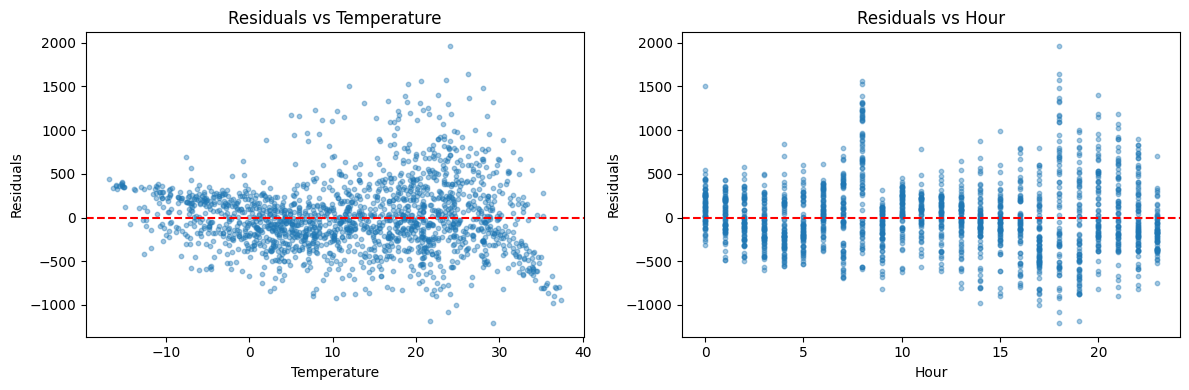

In [ ]:
# Linearity Check: Residuals vs Predictor
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Residuals vs Temperature
axes[0].scatter(X_test_fe['Temperature'], residuals_improved, alpha=0.4, s=10)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residuals vs Temperature')

# Residuals vs Hour
axes[1].scatter(X_test_fe['Hour'], residuals_improved, alpha=0.4, s=10)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Hour')

plt.tight_layout()
plt.show()

Plot *Residuals vs Temperature* menunjukkan sebaran yang relatif acak di sekitar garis nol, menandakan bahwa asumsi linearitas secara umum terpenuhi. Namun, terlihat pola heteroskedastisitas yang jelas, di mana varians residual membesar seiring dengan naiknya temperatur. Artinya, model menjadi kurang presisi saat suhu lebih hangat.

Pada plot *Residuals vs Hour*, varians residual tampak melebar signifikan pada jam-jam sibuk (pukul 08.00–09.00 dan 17.00–19.00). Ini menunjukkan tingginya variabilitas permintaan pada periode tersebut. Meskipun pola non-linear jam telah ditangani melalui *feature engineering* (transformasi siklikal *sin/cos* dan fitur *is_rush_hour*), plot ini memperlihatkan masih adanya dinamika permintaan ekstrem di jam sibuk yang belum sepenuhnya tertangkap oleh model linear.

Secara keseluruhan, membesarnya varians pada temperatur tinggi dan jam sibuk memperlihatkan tingkat ketidakpastian (*uncertainty*) model meningkat justru pada saat permintaan sepeda sedang tinggi-tingginya.

---
## **10. Penanganan Heteroskedastisitas**

Untuk mengatasi pola heteroskedastisitas yang terdeteksi, dilakukan transformasi logaritmik pada target variable menggunakan fungsi `log1p(y) = log(1 + y)`. Pendekatan ini dipilih karena distribusi Rented Bike Count yang right-skewed dengan banyak nilai rendah dan sedikit nilai tinggi. Transformasi logaritmik dapat menekan nilai ekstrem sehingga variance menjadi lebih homogen, dan umum digunakan untuk data count yang tidak memiliki nilai negatif.

### 10.1. Transformasi dan Training

In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Train model dengan target yang sudah ditransformasi
model_log = LinearRegression()
model_log.fit(X_train_scaled, y_train_log)
y_pred_log = model_log.predict(X_test_scaled)

# Inverse transform untuk mendapatkan prediksi dalam skala asli
y_pred_log_original = np.expm1(y_pred_log)

pd.DataFrame({
    'actual': y_test[:10].values,
    'predicted_improved': y_pred_improved[:10].round(2),
    'predicted_log_transform': y_pred_log_original[:10].round(2)
})

,actual,predicted_improved,predicted_log_transform
0,1728,1104.63,895.44
1,822,1112.68,1046.65
2,658,1310.14,1448.78
3,2716,1620.17,1880.59
4,1083,724.58,454.94
5,636,790.33,574.19
6,1537,1313.84,898.42
7,712,979.21,860.99
8,425,1102.47,853.40
9,594,823.85,583.03


### 10.2. Evaluasi Residual Setelah Transform

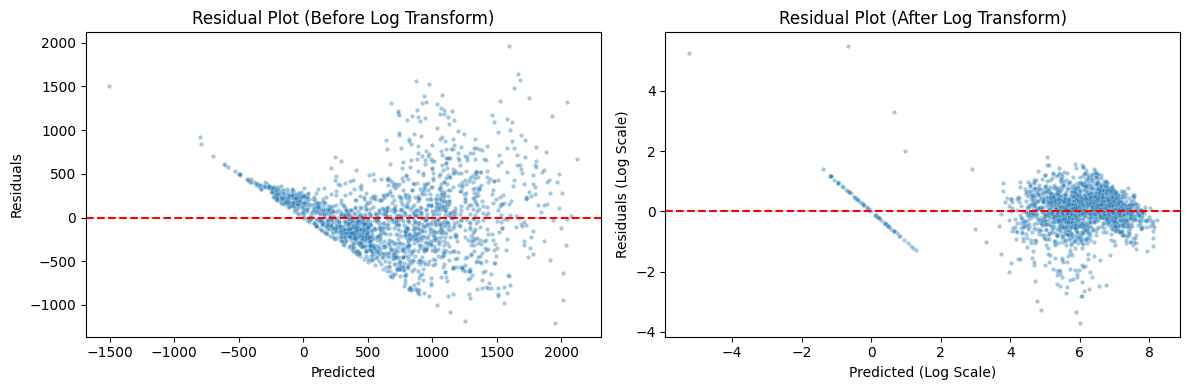

In [ ]:
# Residual dalam skala log
residuals_log = y_test_log - y_pred_log

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Residual Plot - Sebelum (Improved Model)
sns.scatterplot(x=y_pred_improved, y=residuals_improved, alpha=0.4, s=10, ax=axes[0])
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot (Before Log Transform)')

# Residual Plot - Sesudah (Log Transform)
sns.scatterplot(x=y_pred_log, y=residuals_log, alpha=0.4, s=10, ax=axes[1])
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted (Log Scale)')
axes[1].set_ylabel('Residuals (Log Scale)')
axes[1].set_title('Residual Plot (After Log Transform)')

plt.tight_layout()
plt.show()

### 10.3. Uji Normalitas Residual Setelah Transform

In [ ]:
sample_residuals_log = np.random.choice(residuals_log, size=min(5000, len(residuals_log)), replace=False)
shapiro_stat_log, shapiro_p_log = stats.shapiro(sample_residuals_log)
skewness_log = stats.skew(residuals_log)
kurtosis_log = stats.kurtosis(residuals_log)

print(f"Shapiro-Wilk (Log): stat={shapiro_stat_log:.4f}, p={shapiro_p_log:.6f}")
print(f"Skewness: {skewness_log:.4f} | Kurtosis: {kurtosis_log:.4f}")
print(f"Hasil: {'Normal' if shapiro_p_log >= 0.05 else 'Tidak Normal'}")

Shapiro-Wilk (Log): stat=0.9239, p=0.000000
Skewness: -0.3535 | Kurtosis: 6.9002
Hasil: Tidak Normal


### 10.4. Perbandingan Performa

In [ ]:
r2_log = r2_score(y_test, y_pred_log_original)
n, p = X_test_scaled.shape
adj_r2_log = 1 - (1 - r2_log) * (n - 1) / (n - p - 1)
mae_log = mean_absolute_error(y_test, y_pred_log_original)
mse_log = mean_squared_error(y_test, y_pred_log_original)
rmse_log = np.sqrt(mse_log)

comparison_all = pd.DataFrame({
    'Metric': ['R²', 'Adjusted R²', 'MAE', 'MSE', 'RMSE'],
    'Baseline': [round(r2, 4), round(adj_r2, 4), round(mae, 2), round(mse, 2), round(rmse, 2)],
    'Improved': [round(r2_improved, 4), round(adj_r2_improved, 4), round(mae_improved, 2), round(mse_improved, 2), round(rmse_improved, 2)],
    'Log Transform': [round(r2_log, 4), round(adj_r2_log, 4), round(mae_log, 2), round(mse_log, 2), round(rmse_log, 2)]
})

comparison_all

,Metric,Baseline,Improved,Log Transform
0,R²,0.5329,0.6189,0.5724
1,Adjusted R²,0.5294,0.6149,0.5679
2,MAE,330.9500,299.6100,267.0800
3,MSE,194612.1400,158785.2100,178175.1300
4,RMSE,441.1500,398.4800,422.1100


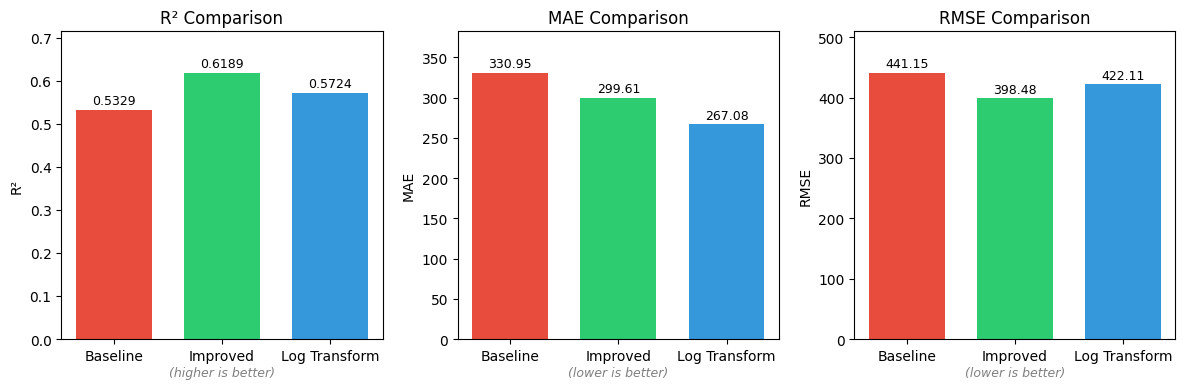

In [ ]:
# Visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

metrics = ['R²', 'MAE', 'RMSE']
baseline_vals = [r2, mae, rmse]
improved_vals = [r2_improved, mae_improved, rmse_improved]
log_vals = [r2_log, mae_log, rmse_log]

x = np.arange(3)
width = 0.7

for i, (metric, base, imp, log) in enumerate(zip(metrics, baseline_vals, improved_vals, log_vals)):
    bars1 = axes[i].bar(x[0], base, width, color='#e74c3c', label='Baseline')
    bars2 = axes[i].bar(x[1], imp, width, color='#2ecc71', label='Improved')
    bars3 = axes[i].bar(x[2], log, width, color='#3498db', label='Log Transform')

    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(['Baseline', 'Improved', 'Log Transform'])

    for bar in [bars1, bars2, bars3]:
        height = bar[0].get_height()
        axes[i].text(bar[0].get_x() + bar[0].get_width()/2., height + 0.01*height,
                    f'{height:.2f}' if metric != 'R²' else f'{height:.4f}',
                    ha='center', va='bottom', fontsize=9)

    ymin, ymax = axes[i].get_ylim()
    axes[i].set_ylim(ymin, ymax * 1.1)

    if metric == 'R²':
        axes[i].text(0.5, -0.12, '(higher is better)', ha='center', transform=axes[i].transAxes,
                     fontsize=9, fontstyle='italic', color='gray')
    else:
        axes[i].text(0.5, -0.12, '(lower is better)', ha='center', transform=axes[i].transAxes,
                     fontsize=9, fontstyle='italic', color='gray')

plt.tight_layout()
plt.show()

Setelah dilakukan transformasi logaritmik pada target variable, diperoleh hasil yang bervariasi antar metrik evaluasi. MAE mengalami penurunan dari 299.61 menjadi 267.08 (-10.85%), menunjukkan bahwa model lebih akurat untuk prediksi kasus tipikal. Namun, R² turun dari 0.6189 menjadi 0.5724 dan RMSE naik dari 398.48 menjadi 422.11.

Hal ini terjadi karena log transform menekan nilai ekstrem pada saat training, namun ketika prediksi di-inverse transform kembali ke skala asli menggunakan `expm1`, error pada nilai tinggi menjadi lebih besar. Untuk data bike sharing yang memiliki banyak peak demand, karakteristik ini menyebabkan log transform kurang optimal.

Berdasarkan hasil tersebut, **model Improved (feature engineered) tetap menjadi pilihan terbaik** dengan R² tertinggi dan RMSE terendah. Heteroskedastisitas yang tersisa menjadi limitasi model yang perlu diterima dalam konteks Linear Regression.

---
## **11. Interpretasi Model**

### 11.1. Koefisien

Untuk keperluan interpretasi koefisien dalam unit asli, model dilatih ulang menggunakan data tanpa scaling. Performa model yang dilaporkan tetap mengacu pada model dengan feature scaling.

In [ ]:
model_final = LinearRegression()
model_final.fit(X_train_fe, y_train)

coef_df = pd.DataFrame({
    'feature': X_train_fe.columns,
    'coefficient': model_final.coef_
})
coef_df['abs_coef'] = coef_df['coefficient'].abs()
coef_df = coef_df.sort_values('abs_coef', ascending=False).drop(columns='abs_coef')

print(f"Intercept: {model_final.intercept_:.2f}")
print(f"\nKoefisien Model (dengan fitur baru):")
coef_df

Intercept: -419.69

Koefisien Model (dengan fitur baru):


,feature,coefficient
9,Functioning Day,934.215040
13,is_rush_hour,395.968826
12,Season_Winter,-372.017779
14,hour_sin,-154.008268
10,Season_Spring,-152.078749
8,Holiday,-122.515898
11,Season_Summer,-89.331162
15,hour_cos,66.603805
6,Rainfall,-57.043738
1,Temperature,35.588461


### 11.2. Feature Importance Plot

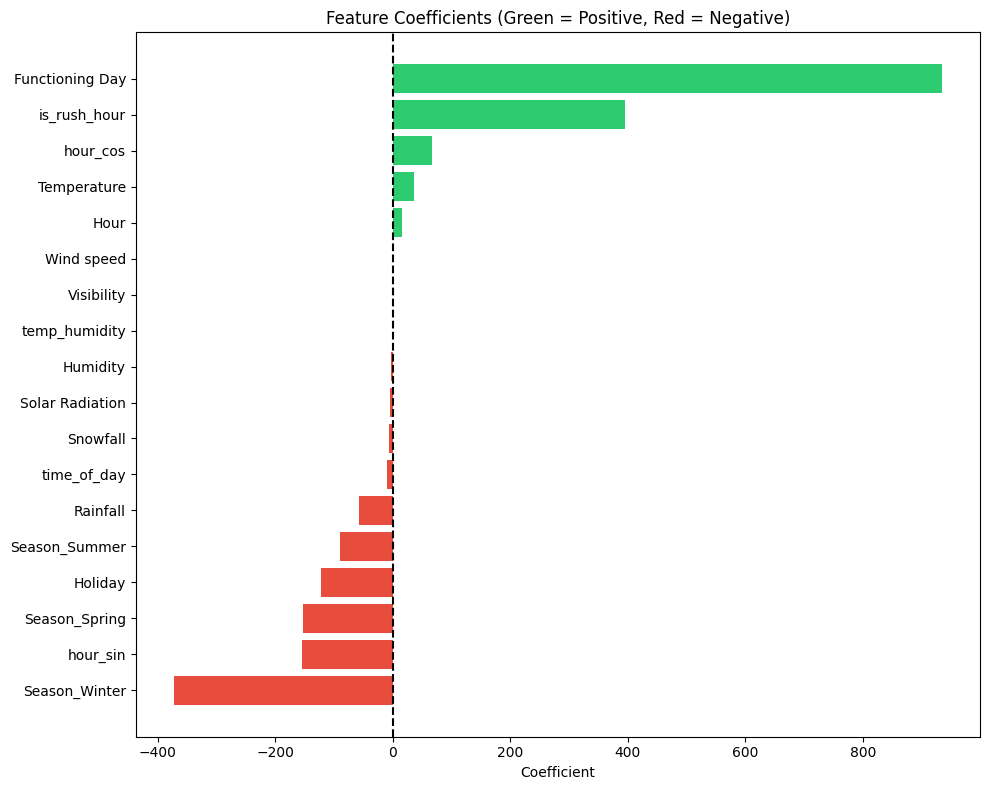

In [ ]:
coef_sorted = coef_df.sort_values('coefficient')

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#e74c3c' if c < 0 else '#2ecc71' for c in coef_sorted['coefficient']]
ax.barh(coef_sorted['feature'], coef_sorted['coefficient'], color=colors)
ax.axvline(x=0, color='black', linestyle='--')
ax.set_xlabel('Coefficient')
ax.set_title('Feature Coefficients (Green = Positive, Red = Negative)')
plt.tight_layout()
plt.show()

Hari operasional memiliki pengaruh positif terbesar terhadap penyewaan dengan koefisien sekitar 934, artinya saat layanan beroperasi, penyewaan meningkat drastis. Jam sibuk juga berkontribusi signifikan dengan koefisien +395, menunjukkan lonjakan permintaan pada jam 7-9 pagi dan 17-19 sore.

Untuk pengaruh negatif, musim dingin memiliki koefisien terbesar, menunjukkan penyewaan jauh lebih rendah di musim dingin dibandingkan baseline. Penyewaan di musim semi dan panas lebih tinggi dibanding musim dingin namun masih di bawah musim gugur (Autumn sebagai reference category). Transformasi siklikal jam (hour_sin), hari libur, dan hujan dengan juga menurunkan minat bersepeda.

### 11.3. Uji Signifikansi Variabel (P-Value)

Untuk memastikan variabel yang digunakan benar-benar berpengaruh signifikan, dilakukan uji statistik menggunakan Ordinary Least Squares (OLS) dari statsmodels.

Uji ini menguji hipotesis **H₀: βᵢ = 0** (variabel tidak berpengaruh) vs **H₁: βᵢ ≠ 0** (variabel berpengaruh). Variabel dengan p-value > 0.05 menunjukkan bahwa koefisiennya tidak signifikan berbeda dari nol pada tingkat kepercayaan 95%, sehingga dianggap tidak memberikan kontribusi signifikan terhadap prediksi Rented Bike Count dan akan dikeluarkan dari persamaan regresi final.

In [ ]:
import statsmodels.api as sm

# Tambahkan konstanta untuk intercept
X_train_sm = sm.add_constant(X_train_fe)

# Fit model dengan statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Tampilkan summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     659.3
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        04:48:39   Log-Likelihood:                -51801.
No. Observations:                7008   AIC:                         1.036e+05
Df Residuals:                    6989   BIC:                         1.038e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -419.6916     51.687     

In [ ]:
# Ambil p-values
pvalues = model_sm.pvalues[1:]  # Skip intercept
coefs = model_sm.params[1:]

# Filter variabel signifikan (p < 0.05)
significant = pvalues[pvalues < 0.05]
print(f"Variabel signifikan (p < 0.05): {len(significant)} dari {len(pvalues)}")
print(significant.index.tolist())

Variabel signifikan (p < 0.05): 14 dari 18
['Hour', 'Temperature', 'Humidity', 'Visibility', 'Rainfall', 'Holiday', 'Functioning Day', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'is_rush_hour', 'hour_sin', 'hour_cos', 'temp_humidity']


Dari hasil uji signifikansi, variabel `Wind Speed` (p=0.863), `Solar Radiation` (p=0.717), `Snowfall` (p=0.546), dan `time_of_day` (p=0.235) tidak signifikan secara statistik sehingga akan dikeluarkan dari persamaan regresi final.

### 11.4. Persamaan Regresi

In [ ]:
intercept = model_final.intercept_
equation = f"Rented Bike Count = {intercept:.2f}"

non_sig = ['Wind speed', 'Solar Radiation', 'Snowfall', 'time_of_day']

for feat, coef in zip(X_train_fe.columns, model_final.coef_):
    if feat not in non_sig:
        sign = ' + ' if coef >= 0 else ' - '
        equation += f"{sign}{abs(coef):.2f}*{feat}"

print("Persamaan Regresi:")
print(equation)

Persamaan Regresi:
Rented Bike Count = -419.69 + 15.44*Hour + 35.59*Temperature - 3.07*Humidity + 0.03*Visibility - 57.04*Rainfall - 122.52*Holiday + 934.22*Functioning Day - 152.08*Season_Spring - 89.33*Season_Summer - 372.02*Season_Winter + 395.97*is_rush_hour - 154.01*hour_sin + 66.60*hour_cos - 0.26*temp_humidity


---
## **12. Persamaan Multiple Linear Regression**

Secara umum, persamaan Multiple Linear Regression dinyatakan sebagai:

$$\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n$$

Dimana:
- $Y$ = variabel dependen (target)
- $\beta_0$ = Intercept
- $\beta_1, \beta_2, \ldots$ = koefisien regresi
- $X_1, X_2, \ldots$ = variabel independen (fitur)

Dari model yang telah dibangun dengan feature engineering, diperoleh persamaan regresi:

$$
\begin{aligned}
\text{Rented Bike Count} = & -419.69 + (15.44 \times \text{Hour}) + (35.59 \times \text{Temperature}) \\
& - (3.07 \times \text{Humidity}) + (0.03 \times \text{Visibility}) \\
& - (57.04 \times \text{Rainfall}) - (122.52 \times \text{Holiday}) \\
& + (934.22 \times \text{Functioning Day}) - (152.08 \times \mathrm{Season\_Spring}) \\
& - (89.33 \times \mathrm{Season\_Summer}) - (372.02 \times \mathrm{Season\_Winter}) \\
& + (395.97 \times \mathrm{is\_rush\_hour}) - (154.01 \times \mathrm{hour\_sin}) \\
& + (66.60 \times \mathrm{hour\_cos}) - (0.26 \times \mathrm{temp\_humidity})
\end{aligned}
$$

---
## Kesimpulan

Proyek ini bertujuan untuk memprediksi jumlah penyewaan sepeda berdasarkan kondisi cuaca dan waktu menggunakan algoritma Multiple Linear Regression.

### Hasil Analisis

Dataset terdiri dari 8760 observasi dengan 14 variabel. Setelah preprocessing yang meliputi encoding variabel kategorikal, penghapusan outlier pada target variable, dan penanganan multikolinearitas (drop Dew Point Temperature karena VIF tinggi), tersisa 8602 data untuk pemodelan.

### Performa Model

| Model | R² | MAE | RMSE |
|-------|-----|-----|------|
| Baseline | 0.5329 | 330.95 | 441.15 |
| Improved | 0.6189 (+16.14%) | 299.61 (-9.47%) | 398.48 (-9.67%) |
| Log Transform | 0.5724 (+7.42%) | 267.08 (-19.30%) | 422.11 (-4.31%) |

Feature engineering (is_rush_hour, hour_sin, hour_cos, temp_humidity, time_of_day) dan feature scaling berhasil meningkatkan R² sebesar 16.14% dan menurunkan error prediksi. Transformasi logaritmik pada target variable juga dicoba untuk mengatasi heteroskedastisitas, namun meskipun MAE membaik, R² dan RMSE justru memburuk karena inverse transform memperbesar error pada nilai ekstrem. Oleh karena itu, model Improved dipilih sebagai model final.

### Faktor Paling Berpengaruh

Berdasarkan analisis koefisien, faktor yang paling mempengaruhi jumlah penyewaan sepeda adalah:

1. **Functioning Day** (+934): Hari operasional sangat meningkatkan penyewaan
2. **is_rush_hour** (+395): Jam sibuk (7-9 pagi dan 17-19 sore) meningkatkan penyewaan
3. **Season_Winter** (-372): Musim dingin menurunkan penyewaan drastis dibanding musim gugur
4. **Holiday** (-122): Hari libur menurunkan penyewaan
5. **Rainfall** (-57): Hujan menurunkan minat bersepeda

### Limitasi

Hasil uji asumsi menunjukkan bahwa residual tidak sepenuhnya berdistribusi normal dan terdapat heteroskedastisitas. Upaya penanganan melalui transformasi logaritmik telah dilakukan namun tidak memberikan perbaikan yang konsisten di semua metrik. Hal ini menandakan bahwa model non-linear seperti Random Forest atau Gradient Boosting mungkin lebih sesuai untuk data ini.